In [2]:
from sklearn.datasets import make_circles

In [14]:
from sklearn.model_selection import train_test_split
X, y = make_circles(factor=0.5, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
try:
    import mglearn
except:
    !pip install mglearn
    import mglearn
# mglearn.plots.plot_2d_classification(linear_svm, X_train, eps=0.5, cm = 'terrain')
# mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

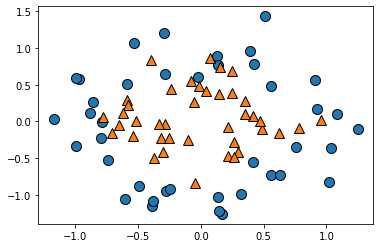

In [16]:
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [18]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf', C=1, gamma=1)
svc_clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

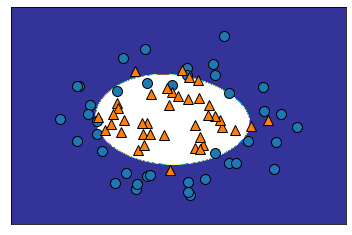

In [20]:
mglearn.plots.plot_2d_classification(svc_clf, X_train, eps=0.5, cm = 'terrain')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [28]:
C_list = [0.01, 0.1, 1, 10]
gamma_list = [0.01, 0.1, 1, 10]

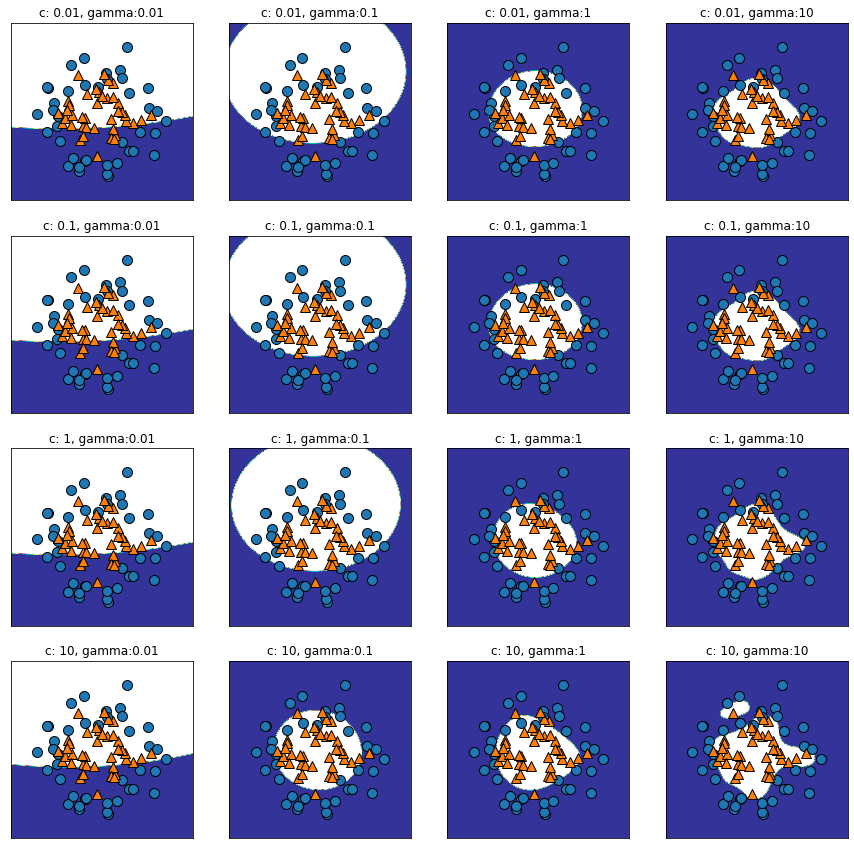

In [31]:
model_list = {}
count = 1
plt.figure(figsize=(15, 15))
for idx, c in enumerate(C_list):
    for idx2, gamma in enumerate(gamma_list):
        idx = idx+1
        idx2 = idx2 +1

        plt.subplot(4,4, count)
        count +=1

        svc_clf = SVC(kernel='rbf', C=c, gamma=gamma)
        model_key = (c, gamma)
        svc_clf.fit(X_train, y_train)

        model_list[model_key] = svc_clf
        plt.gca().set_title('c: {}, gamma:{}'.format(c, gamma))
        mglearn.plots.plot_2d_classification(svc_clf, X_train, eps=0.5, cm = 'terrain')
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


In [35]:
model_list[(10,10)].score(X_train, y_train)
model_list[(10,10)].score(X_test, y_test)

0.85

In [37]:
for i in model_list:
    train_score = model_list[i].score(X_train, y_train)
    test_score = model_list[i].score(X_test, y_test)
    print(i)
    print("Train Score: {}".format(train_score))
    print("Test Score: {}".format(test_score))
    print("-"*10)
    

(0.01, 0.01)
Train Score: 0.6375
Test Score: 0.4
----------
(0.01, 0.1)
Train Score: 0.7
Test Score: 0.5
----------
(0.01, 1)
Train Score: 0.8125
Test Score: 0.9
----------
(0.01, 10)
Train Score: 0.925
Test Score: 0.95
----------
(0.1, 0.01)
Train Score: 0.6375
Test Score: 0.4
----------
(0.1, 0.1)
Train Score: 0.7
Test Score: 0.5
----------
(0.1, 1)
Train Score: 0.8125
Test Score: 0.9
----------
(0.1, 10)
Train Score: 0.925
Test Score: 0.95
----------
(1, 0.01)
Train Score: 0.6375
Test Score: 0.4
----------
(1, 0.1)
Train Score: 0.6875
Test Score: 0.5
----------
(1, 1)
Train Score: 0.85
Test Score: 0.95
----------
(1, 10)
Train Score: 0.925
Test Score: 0.9
----------
(10, 0.01)
Train Score: 0.6375
Test Score: 0.45
----------
(10, 0.1)
Train Score: 0.875
Test Score: 0.95
----------
(10, 1)
Train Score: 0.8625
Test Score: 0.9
----------
(10, 10)
Train Score: 0.95
Test Score: 0.85
----------


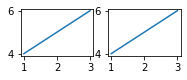

In [26]:
plt.subplot(4,4, 1)
plt.plot([1,2,3], [4,5,6])
plt.subplot(4,4,2)
plt.plot([1,2,3], [4,5,6])


# wine data를 SVC 를 사용해 분류하고 시각화.

In [38]:
from sklearn.datasets import load_wine

In [40]:
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

In [42]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [45]:
import pandas as pd

In [46]:
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [48]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [51]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
train_score = svm_clf.score(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
test_score = svm_clf.score(X_test_scaled, y_test)

In [54]:
print("train score: {} \n test score: {}".format(train_score, test_score))

train score: 1.0 
 test score: 1.0


In [57]:
svm_clf.coef_

array([[ 6.75096431e-01,  4.54952999e-01,  5.27652266e-01,
        -1.04885301e+00,  2.84419072e-01,  1.17590528e-01,
         5.81695968e-01, -2.85759379e-01, -1.17396342e-01,
         2.31628187e-01, -6.72330913e-02,  3.27546193e-01,
         8.69087650e-01],
       [ 1.69401298e-02,  7.67915319e-02,  3.84229937e-02,
        -1.93466697e-01, -4.13281777e-02,  1.97176106e-01,
         3.42509387e-01, -1.11827902e-01,  1.76729338e-01,
        -1.49556395e-01,  2.02671696e-01,  2.98262204e-01,
         1.72132274e-01],
       [-2.69164139e-01, -1.07067418e-03, -6.09803713e-01,
        -2.27273474e-02, -3.68087524e-02, -8.40513978e-02,
         1.16737361e+00,  2.28968761e-01,  1.79837481e-01,
        -7.67872026e-01,  8.99611361e-01,  5.77849097e-01,
        -8.31794044e-02]])

2차원 데이터로 SVC

In [59]:
wine_data.feature_names
X2_train_scaled = X_train_scaled[:, [6,11]]
X2_test_scaled = X_test_scaled[:, [6, 11]]

train score: 0.8380281690140845 
 test score: 0.8888888888888888


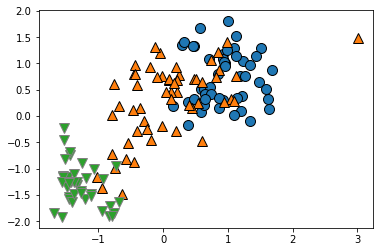

In [65]:
svc_clf = SVC(kernel='linear')
svc_clf.fit(X2_train_scaled, y_train)
train_score = svc_clf.score(X2_train_scaled, y_train)
test_score = svc_clf.score(X2_test_scaled, y_test)
print("train score: {} \n test score: {}".format(train_score, test_score))
mglearn.discrete_scatter(X2_train_scaled[:, 0], X2_train_scaled[:, 1], y_train)

In [66]:
# 

[array([[ 0.1,  1. , 10. ],
        [ 0.1,  1. , 10. ],
        [ 0.1,  1. , 10. ]]), array([[ 0.1,  0.1,  0.1],
        [ 1. ,  1. ,  1. ],
        [10. , 10. , 10. ]])]

C: 0.1, gamma:0.1
train score: 0.7394366197183099 
 test score: 0.7777777777777778
C: 0.1, gamma:1
train score: 0.8450704225352113 
 test score: 0.8888888888888888
C: 0.1, gamma:100
train score: 0.39436619718309857 
 test score: 0.4166666666666667
C: 1, gamma:0.1
train score: 0.823943661971831 
 test score: 0.8888888888888888
C: 1, gamma:1
train score: 0.8591549295774648 
 test score: 0.9444444444444444
C: 1, gamma:100
train score: 0.971830985915493 
 test score: 0.7222222222222222
C: 100, gamma:0.1
train score: 0.8450704225352113 
 test score: 0.9444444444444444
C: 100, gamma:1
train score: 0.8802816901408451 
 test score: 0.8333333333333334
C: 100, gamma:100
train score: 1.0 
 test score: 0.8055555555555556


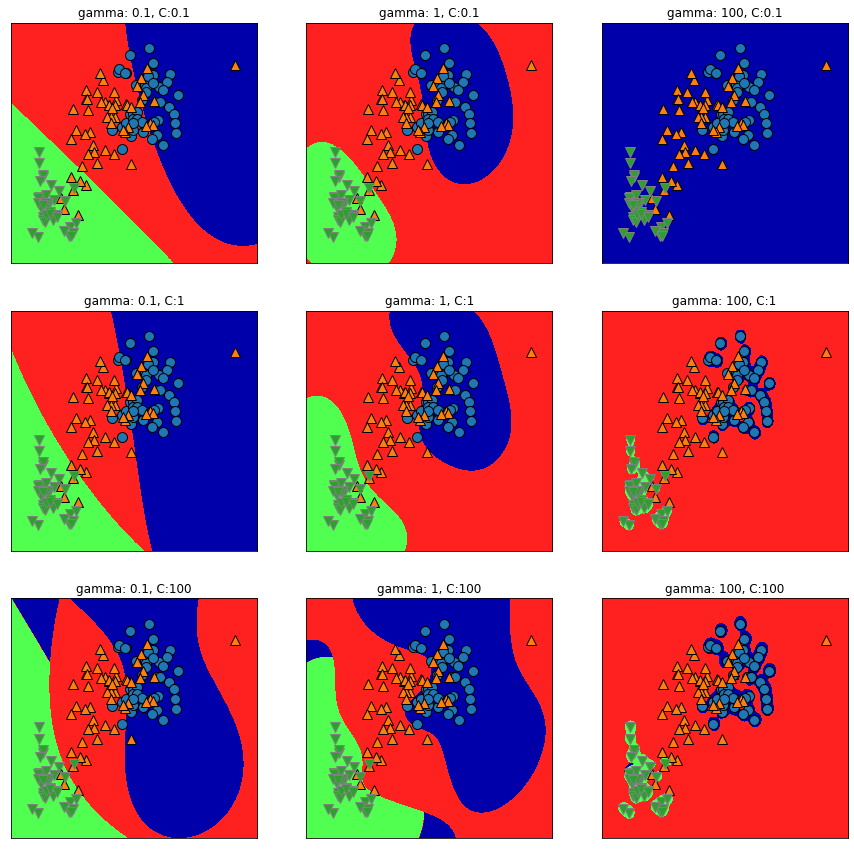

In [74]:
C_list = [0.1, 1, 100]
gamma_list = [0.1, 1, 100]
count = 1
plt.figure(figsize=(15,15))
for c in C_list:
    for gamma in gamma_list:
        svc_clf = SVC(kernel='rbf', C=c, gamma=gamma)
        svc_clf.fit(X2_train_scaled, y_train)
        train_score = svc_clf.score(X2_train_scaled, y_train)
        test_score = svc_clf.score(X2_test_scaled, y_test)
        plt.subplot(3, 3, count)
        plt.gca().set_title('gamma: {}, C:{}'.format(gamma, c))

        print("C: {}, gamma:{}".format(c, gamma))
        print("train score: {} \n test score: {}".format(train_score, test_score))
        mglearn.discrete_scatter(X2_train_scaled[:, 0], X2_train_scaled[:, 1], y_train)
        
        mglearn.plots.plot_2d_classification(svc_clf, X2_train_scaled, eps=0.5)

        count+=1